# Part A

### 1. Project environment & packages

In [292]:
using Pkg
Pkg.activate("..")

using DrWatson
@quickactivate "FE2P1SvobodaVlach"

  Activating project at `C:\Users\František Vlach\F_link\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach`


In [293]:
#Pkg.add("MarketData")
#Pkg.add("Dates")
#Pkg.add("DataFrames")
# Pkg.add("StatsPlots")
# Pkg.add("ARCHModels")

using MarketData
using Dates
using DataFrames
using StatsPlots
using ARCHModels

In [294]:
# Pkg.add("GLM")
# Pkg.add("Plots")
# Pkg.add("Random")

using GLM 
using Plots 
using Random 

In [295]:
# Pkg.add("Flux")
# Pkg.add("Optim")
# Pkg.add("Statistics")

using Flux 
using Optim 
using Statistics 

### 2. Download data for Apple

In [296]:
ticker = "AAPL"

start_date = DateTime(2021, 1, 1)
stop_date = DateTime(2022, 12, 10)

2022-12-10T00:00:00

In [297]:
data_apple = DataFrame(yahoo(ticker, YahooOpt(period1 = start_date, period2 = stop_date)));

In [298]:
data_apple

Row,timestamp,Open,High,Low,Close,AdjClose,Volume
,Date,Float64,Float64,Float64,Float64,Float64,Float64
1,2021-01-04,133.52,133.61,126.76,129.41,126.683,1.43302e8
2,2021-01-05,128.89,131.74,128.43,131.01,128.25,9.76649e7
3,2021-01-06,127.72,131.05,126.38,126.6,123.933,1.55088e8
4,2021-01-07,128.36,131.63,127.86,130.92,128.162,1.09578e8
5,2021-01-08,132.43,132.63,130.23,132.05,129.268,1.05158e8
6,2021-01-11,129.19,130.17,128.5,128.98,126.262,1.00384e8
7,2021-01-12,128.5,129.69,126.86,128.8,126.086,9.19511e7
8,2021-01-13,128.76,131.45,128.49,130.89,128.132,8.86368e7
9,2021-01-14,130.8,131.0,128.76,128.91,126.194,9.02218e7


### 3. Summary statistics & plots

In [299]:
first(data_apple, 3)

Row,timestamp,Open,High,Low,Close,AdjClose,Volume
,Date,Float64,Float64,Float64,Float64,Float64,Float64
1,2021-01-04,133.52,133.61,126.76,129.41,126.683,1.43302e8
2,2021-01-05,128.89,131.74,128.43,131.01,128.25,9.76649e7
3,2021-01-06,127.72,131.05,126.38,126.6,123.933,1.55088e8


In [300]:
typeof(data_apple)

DataFrame

In [301]:
size(data_apple)

(489, 7)

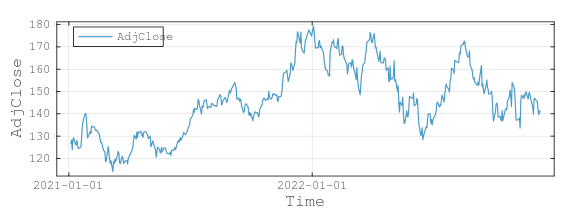

In [302]:
plot(data_apple.timestamp, data_apple.AdjClose, 
    line=(1.5, 0.7, :solid), size=(800,300), palette=:seaborn_colorblind,
    label="AdjClose", xlabel="Time", ylabel="AdjClose", 
    margin=5Plots.mm)

# savefig(plotsdir("apple_adjclose.png")) # Save to "plots/"

In [303]:
summary_stats = describe(data_apple[:, :AdjClose])

Summary Stats:
Length:         489
Missing Count:  0
Mean:           146.061158
Std. Deviation: 15.530349
Minimum:        114.078598
1st Quartile:   134.078644
Median:         145.680511
3rd Quartile:   157.377823
Maximum:        179.273605
Type:           Float64


### 4. Model & forecast

In [304]:
# Parameters
pred_length = 10 # Number of predictions

10

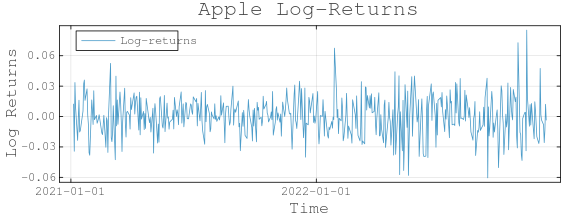

In [305]:
# Log-returns
ret_apple = DataFrame(
    returns = diff(log.(data_apple[:, :AdjClose])),
    timestamp = data_apple.timestamp[2:end]
)

plot(ret_apple.timestamp, ret_apple.returns,
    line=(1, 0.7), size=(800,300),
    xlabel="Time", ylabel="Log Returns",
    title="Apple Log-Returns", label="Log-returns"
)

# savefig(plotsdir("apple_logreturns.png")) # Save to "plots/"

In [306]:
# Autocoorelation function -> used on prices or returns???
plot(autocor(ret_apple.returns, 1:20),
    seriestype=:bar, 
    xlabel="Lag", 
    ylabel="Autocorrelation", 
    title="Autocorrelation Function for Apple Returns")

savefig(plotsdir("apple_autocor.png")) # Save to "plots/"

"C:\\Users\\František Vlach\\F_link\\IES\\Financial_econometrics_II\\Project\\FE2P1SvobodaVlach\\plots\\apple_autocor.png"

In [307]:
# Train-test split
train_apple = ret_apple[1:end-pred_length, :]
test_apple = ret_apple[end-pred_length+1:end, :]

Row,returns,timestamp
,Float64,Date
1,-0.0266152,2022-11-28
2,-0.0213751,2022-11-29
3,0.04745,2022-11-30
4,0.00188982,2022-12-01
5,-0.00337705,2022-12-02
6,-0.00801516,2022-12-05
7,-0.0256974,2022-12-06
8,-0.0138806,2022-12-07
9,0.0120596,2022-12-08


In [308]:
# Fit
garch_fit = fit(GARCH{1,1}, train_apple.returns)


GARCH{1, 1} model with Gaussian errors, T=478.

Mean equation parameters:
──────────────────────────────────────────────
      Estimate    Std.Error  z value  Pr(>|z|)
──────────────────────────────────────────────
μ  0.000953494  0.000843344  1.13061    0.2582
──────────────────────────────────────────────

Volatility parameters:
─────────────────────────────────────────────
     Estimate   Std.Error   z value  Pr(>|z|)
─────────────────────────────────────────────
ω   4.1135e-6  3.98482e-6   1.03229    0.3019
β₁  0.938778   0.0254259   36.9221     <1e-99
α₁  0.0519789  0.0196403    2.64654    0.0081
─────────────────────────────────────────────


In [309]:
garch_pred = predict.(garch_fit, :return, 1:pred_length) #TODO: This is probably not right 

10-element Vector{Float64}:
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967

### 5. Forecasts plot

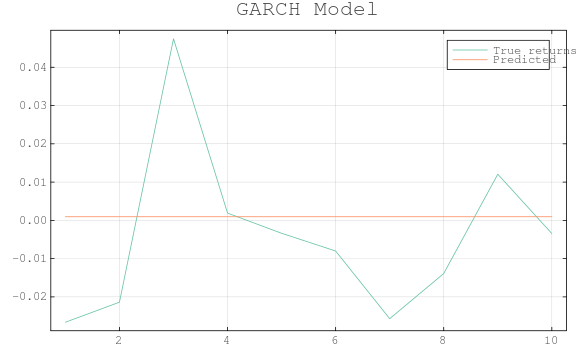

In [395]:
p1 = plot(test_apple.returns, lab="True returns", leg=:topright, title="GARCH Model", palette=:Set2_3)
p1 = plot!(garch_pred, lab="Predicted")

In [311]:
garch_pred

10-element Vector{Float64}:
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967
 0.000953494491449967

# Part B

In [312]:
""" Create HAR regressors """
function HAR_regressors(data)

    RVd = data[22:end-1] # days
    RVw = zeros(length(RVd)) # weeks
    for i in 22:(length(data)-1)
       temp = 0
       for h in 0:4
           temp = temp + data[i-h]
       end
       RVw[i-21]= temp / 5
    end
    
    RVm = zeros(length(RVd)) # months
    for i in 22:(length(data)-1) 
       temp = 0
       for h in 0:21
           temp = temp + data[i-h]
       end
       RVm[i-21] = temp / 22;
    end

    return [RVd RVw RVm]
end

HAR_regressors

In [313]:
function OLSestimatorconst(y,x)
    x = [ones(size(x)[1]) x]
    return (transpose(x) * x) \ (transpose(x) * y)
end

OLSestimatorconst (generic function with 1 method)

In [314]:
Pkg.add("CSV")

using CSV 

data_RV = CSV.read("../data/AAPL_RV_cut", DataFrame; header=true);

   Resolving package versions...
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Project.toml`
  No Changes to `F:\IES\Financial_econometrics_II\Project\FE2P1SvobodaVlach\Manifest.toml`


In [315]:
data_RV

Row,date,close_price,RV,RSp,RSm,RSk,RKu
,Date,Float64,Float64,Float64,Float64,Float64,Float64
1,2021-01-04,127.83,0.000408303,0.000144278,0.000264025,-0.720102,4.49394
2,2021-01-05,129.38,0.00020036,9.22537e-5,0.000108106,-0.372308,5.8866
3,2021-01-06,125.54,0.00043574,0.00022012,0.00021562,-0.0702839,2.68775
4,2021-01-07,129.13,0.000177425,0.00011503,6.23945e-5,0.628237,3.88186
5,2021-01-08,130.45,0.00028172,0.000107294,0.000174426,-0.85824,4.34304
6,2021-01-11,127.42,0.00013017,7.17541e-5,5.84155e-5,0.344179,3.84482
7,2021-01-12,127.38,0.000191821,7.92236e-5,0.000112597,-0.810512,5.26954
8,2021-01-13,129.29,0.000206985,0.000135162,7.18232e-5,0.966196,4.85013
9,2021-01-14,127.52,0.000112412,4.61014e-5,6.63103e-5,-0.40203,3.42381


In [428]:
OLSestimatorconst(data_RV[23:end,3], HAR_regressors(data_RV[:,3]))

4-element Vector{Float64}:
 8.060733616486554e-5
 0.09543158948862558
 0.4596588728199367
 0.10618062219404387

In [317]:
target = data_RV[:,3]
predictors = HAR_regressors(data_RV[:,3]);

In [318]:
describe(DataFrame(predictors, [:rv_d, :rv_w, :rv_m]))

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,rv_d,0.000241853,2.96161e-5,0.000181801,0.00286198,0,Float64
2,rv_w,0.000243103,4.77755e-5,0.00019194,0.00115254,0,Float64
3,rv_m,0.000250344,7.98417e-5,0.000234765,0.000706106,0,Float64


In [319]:
size(target), size(predictors)

((489,), (467, 3))

In [320]:
using Plots
using Plots.Measures
gr(; fmt = "svg", dpi=72, fontfamily="Arial", framestyle=:box, 
    size=(500 * 1.618, 500), thickness_scaling = 1.1, palette=:seaborn_colorblind, margin=3mm)

Plots.GRBackend()

In [321]:
# training set 
# OLSestimatorconst(RVPX[23:end],HAR_regressors(RVPX)) # how har defines regressors and how yt+1 is defined :)
# ___ verify the horizon we forecast 22 or 23 starting index?
xtrain = predictors[1:400,:] |> permutedims .|> Float32
ytrain = target[23:422] |> permutedims .|> Float32
# validation set # here was a problem with forecasting
xvalid = predictors[401:468,:] |> permutedims .|> Float32
yvalid = target[423:490] |> permutedims .|> Float32;

LoadError: BoundsError: attempt to access 467×3 Matrix{Float64} at index [401:468, 1:3]

In [322]:
ytrain

1×400 Matrix{Float32}:
 0.000127505  8.48787f-5  9.12567f-5  7.9654f-5  …  0.000240944  0.000259541

In [323]:
size(xtrain), size(ytrain) 

((3, 400), (1, 400))

In [365]:
xtrain[:,3]

3-element Vector{Float32}:
 8.487874f-5
 0.00021859464
 0.00043275033

LoadError: UndefVarError: `element` not defined

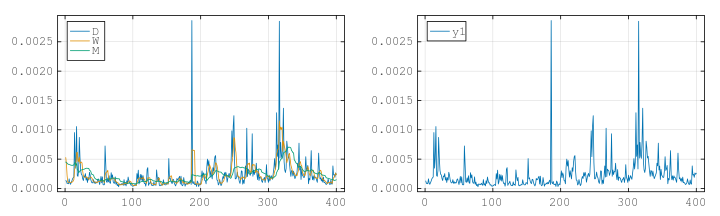

In [325]:
plot(plot(xtrain', labels=["D" "W" "M"]), plot(ytrain'), size=(1000,300))

In [326]:
# plot(plot(sqrt.(xtrain)'), plot(ytrain'), size=(800,300))

In [366]:
xtrain

3×400 Matrix{Float32}:
 0.000131291  0.000127505  8.48787f-5   …  0.000264237  0.000240944
 0.000526728  0.000423103  0.000218595     0.000261404  0.000232791
 0.000450763  0.000437999  0.00043275      0.000142616  0.000147727

In [422]:
function our_train(x_train, y_train, x_valid, y_valid; nodes=[5,2], eta=0.001, n_epochs=100)
    # _ data
    # xtrain (3, T)
    # ytrain (1, T)
    
    # _ model
#    neural_net = Chain(
#                        Dense(size(x_train,1),  nodes[1]),
#                        Dense(nodes[1], nodes[2]),
#                        Dense(nodes[2], size(y_train,1)),
#    )
 
    neural_net = Chain(
                        Dense(size(x_train,1), 1, relu),
                        # Dense(3, size(y_train,1))
    )
    
       
    
    
    # _ loss
    loss(x, y) = Flux.Losses.mse(neural_net(x), y) 
    
    # _ optimization
    opt = Descent(eta)
    # opt = ADAM(eta)
    
    # _ params 
    my_params = Flux.params(neural_net)
    # orig_params = deepcopy(my_params)
    
    # _ reporting 
    losses_train = []
    losses_valid = []
    
    # _ Train loop over the data
    for epoch in 1:n_epochs
        # training
        Flux.train!(loss, my_params, [(x_train, y_train)], opt)
        # reporting
        push!(losses_train, loss(x_train, y_train))
        push!(losses_valid, loss(x_valid, y_valid))
        epoch % 20 == 0 ? println("Epoch $epoch \t Loss: ", losses_train[end], " \t Test: ", losses_valid[end]) : nothing
    end
    
    return neural_net, losses_train, losses_valid
end 

our_train (generic function with 1 method)

In [429]:
OLSestimatorconst(data_RV[23:end,3], HAR_regressors(data_RV[:,3])) 

4-element Vector{Float64}:
 8.060733616486554e-5
 0.09543158948862558
 0.4596588728199367
 0.10618062219404387

In [430]:
Flux.params(model_trained0) |> collect

2-element Vector{Any}:
 Float32[-1.1381326 0.20245765 -0.15083653]
 Float32[7.9868755f-8]

In [423]:
model_trained0, losses01, losses02 = our_train(xtrain, ytrain, xvalid, yvalid; nodes=[50,50], eta=0.001, n_epochs=100);

Epoch 20 	 Loss: 1.2807162e-7 	 Test: 1.3223142e-7
Epoch 40 	 Loss: 1.2807162e-7 	 Test: 1.3223142e-7
Epoch 60 	 Loss: 1.2807159e-7 	 Test: 1.3223142e-7
Epoch 80 	 Loss: 1.2807158e-7 	 Test: 1.3223142e-7
Epoch 100 	 Loss: 1.2807158e-7 	 Test: 1.3223142e-7


In [424]:
function visualize_nn(model)
    layers = model.layers
    for (i, layer) in enumerate(layers)
        println("Layer $i: ", typeof(layer))
        if layer isa Dense
            println("  Input size: $(size(layer.weight, 2))")
            println("  Output size: $(size(layer.weight, 1))")
        end
    end
end

# Assuming model0 is already defined

visualize_nn(model_trained0)

Layer 1: Dense{typeof(relu), Matrix{Float32}, Vector{Float32}}
  Input size: 3
  Output size: 1


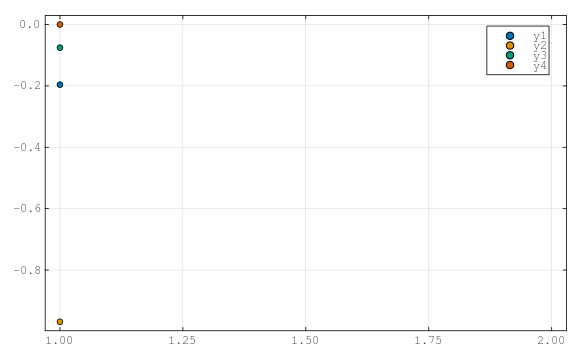

In [409]:
Flux.params(model_trained0) |> collect |> scatter 

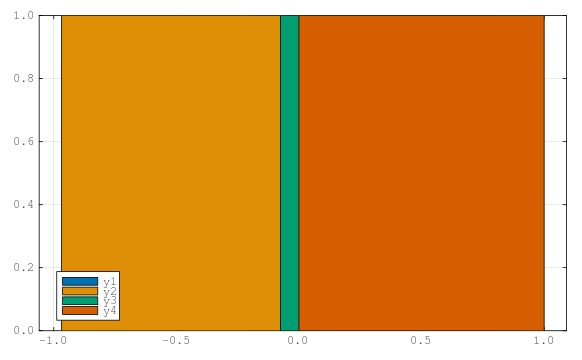

In [410]:
Flux.params(model_trained0) |> collect |> histogram 

In [416]:
# Pkg.add("ChainPlots")

In [381]:
using ChainPlots 

[ Info: Precompiling ChainPlots [43761bbe-b505-42c3-b8bd-5d4ae40fd227]


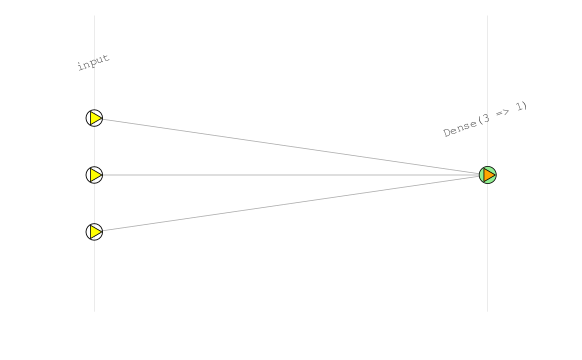

In [417]:
plot(model_trained0)

In [390]:
?chaingraph

search: chaingraph



```
chaingraph(m::Flux.Chain, input_data::Array)
```

Return a MetaGraph representing the graph structure of the neural network.

Each node represents a neuron of the Chain `m` and contains the following properties:     `:layer_number`: Int indicating to each layer it belongs (         with `0` indicating the input layer, `1, …, length(m)-1`          indicating the hidden layers, and with `length(m)` indicating         the output layer);     `:layer_type`: symbol indicating the layer type it is part of in the Chain         (e.g. `:Dense`, `:GRUCell`, `:Conv`, …);     `:index_in_layer`: `Tuple` indicating the position of the neuron         within the layer. The indices cover the size of the layer, which is          given by a Tuple, e.g. of the form `(n,)` for `Dense(n,m)` and         `RNN(n,m)`, or `(n₁, …, nₖ,m,d,b)` for convolutional layers, and so on;     `:layer_center`: Float64 with the vertical mid-point of the layer it belongs to.

---

```
chaingraph(m::Flux.Chain, ldim::Tuple)
```

Return a MetaGraph representing the graph structure of the neural network with an input of shape `ldim`.

See [`chaingraph`](@ref) for the properties of each node of the graph.

---

```
chaingraph(m::Flux.Chain)
```

Return a MetaGraph representing the graph structure of the neural network.

In this case, the first layer must be a layer with fixed input dimension.

See [`chaingraph`](@ref) for the properties of each node of the graph.

---

```
chaingraph(l::Union{Flux.Dense,Flux.Recur,Flux.RNNCell,Flux.LSTMCell,Flux.GRUCell})
```

Return a MetaGraph representing the graph structure of a neural network composed of the single layer `l`.


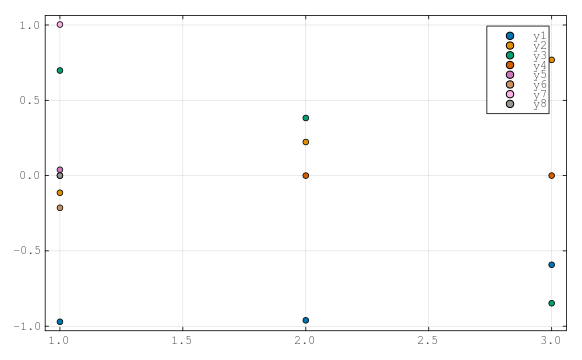

In [362]:
Flux.params(model_trained0) |> collect |> scatter 

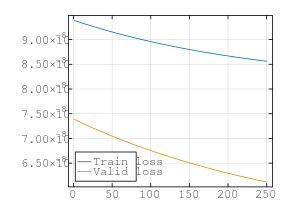

In [344]:
plot([losses01 losses02], labels=["Train loss" "Valid loss"], size=(400,300)) 

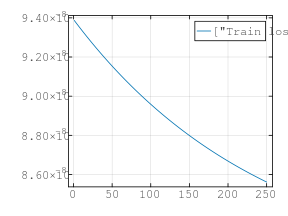

In [346]:
plot([losses01], labels=["Train loss"], size=(400,300)) 

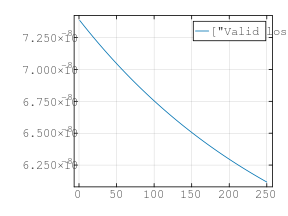

In [347]:
plot([losses02], labels=["Valid loss"], size=(400,300)) 

In [348]:
model_trained0

Chain(
  Dense(3 => 1),                        # 4 parameters
) 

In [349]:
fit_xt = StatsBase.fit(ZScoreTransform, sqrt.(xtrain); dims=2, center=true, scale=true)
fit_xv = StatsBase.fit(ZScoreTransform, sqrt.(xvalid); dims=2, center=true, scale=true)
fit_yt = StatsBase.fit(ZScoreTransform, sqrt.(ytrain); dims=2, center=true, scale=true)
fit_yv = StatsBase.fit(ZScoreTransform, sqrt.(yvalid); dims=2, center=true, scale=true)

ZScoreTransform{Float32, Vector{Float32}}(1, 2, Float32[0.016752832], Float32[0.0049136668])

In [278]:
xt_std = StatsBase.transform(fit_xt, sqrt.(xtrain))
xv_std = StatsBase.transform(fit_xv, sqrt.(xvalid))
yt_std = StatsBase.transform(fit_yt, sqrt.(ytrain))
yv_std = StatsBase.transform(fit_yv, sqrt.(yvalid))

1×68 Matrix{Float32}:
 -0.130766  -0.828538  -0.120808  …  -0.120869  -0.379787  -0.485464

In [280]:
model_trained1, losses11, losses12 = our_train(xt_std, yt_std, xv_std, yv_std; nodes=[100,50], eta=0.001, n_epochs=500);

Epoch 20 	 Loss: 1.0678144 	 Test: 1.0317043
Epoch 40 	 Loss: 0.7886078 	 Test: 0.913412
Epoch 60 	 Loss: 0.71147394 	 Test: 0.9093166
Epoch 80 	 Loss: 0.6902081 	 Test: 0.92277265
Epoch 100 	 Loss: 0.68426704 	 Test: 0.9336457
Epoch 120 	 Loss: 0.68250227 	 Test: 0.93999887
Epoch 140 	 Loss: 0.6818883 	 Test: 0.9431952
Epoch 160 	 Loss: 0.6816084 	 Test: 0.94457674
Epoch 180 	 Loss: 0.68143874 	 Test: 0.9450008
Epoch 200 	 Loss: 0.6813153 	 Test: 0.9449492
Epoch 220 	 Loss: 0.6812183 	 Test: 0.94467735
Epoch 240 	 Loss: 0.6811392 	 Test: 0.94431585
Epoch 260 	 Loss: 0.6810736 	 Test: 0.9439298
Epoch 280 	 Loss: 0.6810191 	 Test: 0.9435506
Epoch 300 	 Loss: 0.68097353 	 Test: 0.9431915
Epoch 320 	 Loss: 0.6809351 	 Test: 0.9428584
Epoch 340 	 Loss: 0.6809028 	 Test: 0.94255203
Epoch 360 	 Loss: 0.680875 	 Test: 0.9422713
Epoch 380 	 Loss: 0.68085206 	 Test: 0.94201493
Epoch 400 	 Loss: 0.68083227 	 Test: 0.94178075
Epoch 420 	 Loss: 0.68081546 	 Test: 0.9415668
Epoch 440 	 Loss: 0.6808

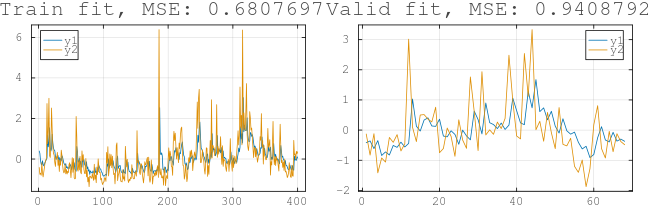

In [281]:
p1 = plot(model_trained1(xt_std)', title="Train fit, MSE: $(Flux.Losses.mse(model_trained1(xt_std),yt_std)) ",)
p1 = plot!(yt_std')
#
p2 = plot(model_trained1(xv_std)', title="Valid fit, MSE: $(Flux.Losses.mse(model_trained1(xv_std),yv_std)) ",)
p2 = plot!(yv_std');
plot(p1, p2, size=(900, 300))

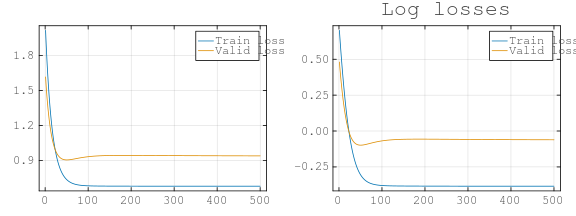

In [282]:
p11 = plot([losses11 losses12], labels=["Train loss" "Valid loss"])
p12 = plot(log.([losses11 losses12]), labels=["Train loss" "Valid loss"], title="Log losses") # might help at some cases
plot(p11, p12, size=(800,300))

In [283]:
model_trained1

Chain(
  Dense(3 => 100),                      # 400 parameters
  Dense(100 => 50),                     # 5_050 parameters
  Dense(50 => 1),                       # 51 parameters
)                   # Total: 6 arrays, 5_501 parameters, 21.863 KiB.